___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])

# Copy dataframe for manipulating
df_copy = df.copy()

## Explore Data

In [3]:
df_copy

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [4]:
df_copy.shape

(6068, 109)

In [5]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 109 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    subjectid                       4082 non-null   float64
 1    abdominalextensiondepthsitting  6068 non-null   int64  
 2    acromialheight                  6068 non-null   int64  
 3    acromionradialelength           6068 non-null   int64  
 4    anklecircumference              6068 non-null   int64  
 5    axillaheight                    6068 non-null   int64  
 6    balloffootcircumference         6068 non-null   int64  
 7    balloffootlength                6068 non-null   int64  
 8    biacromialbreadth               6068 non-null   int64  
 9    bicepscircumferenceflexed       6068 non-null   int64  
 10   bicristalbreadth                6068 non-null   int64  
 11   bideltoidbreadth                6068 non-null   int64  
 12   bimalleolarbreadth

In [6]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.000,20003.371,6568.435,10027.000,14270.250,17236.500,27315.750,29452.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
...,...,...,...,...,...,...,...,...
DODRace,6068.000,1.615,0.979,1.000,1.000,1.000,2.000,8.000
Age,6068.000,29.761,8.675,17.000,23.000,28.000,36.000,58.000
Heightin,6068.000,68.257,3.862,56.000,66.000,68.000,71.000,94.000
Weightlbs,6068.000,174.750,33.692,0.000,150.000,173.000,196.000,321.000


In [7]:
df_copy.duplicated().sum()

0

In [8]:
df_copy.isnull().sum().any()

True

In [9]:
df_copy.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [10]:
print(df_copy["DODRace"].value_counts())

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


In [11]:
# We changed their names to better understand what the numbers on the target label mean
df_copy["DODRace"] = df_copy.DODRace.map({                                     
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

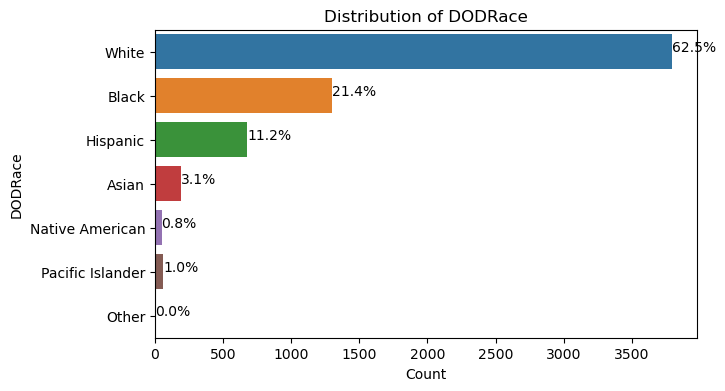

In [12]:
ax = sns.countplot(y="DODRace", data=df_copy)
plt.title('Distribution of DODRace')
plt.xlabel('Count')

total = len(df_copy["DODRace"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [13]:
drop_list1 =[]
for col in df_copy:
    if df_copy[col].isnull().sum()>1800:
        print(f"{col} = {df_copy[col].isnull().sum()}")
        drop_list1.append(col)
drop_list1

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [14]:
df_copy.drop(drop_list1, axis=1, inplace=True)   # Drop them

In [15]:
df_copy.isnull().sum().any()

False

In [16]:
df_copy.shape

(6068, 106)

In [17]:
drop_list2 = ["Date",
              "Installation",
              "Component",
              "Branch",
              "PrimaryMOS",
              "Weightlbs",
              "Heightin",
              "SubjectNumericRace",
]

df_copy.drop(drop_list2, axis=1, inplace=True)   # Drop them

In [18]:
df_copy.shape

(6068, 98)

In [19]:
df_copy.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [20]:
df_copy = df_copy[(df_copy["DODRace"] == "White") | (df_copy["DODRace"] == "Black") | (df_copy["DODRace"] == "Hispanic")]
df_copy

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,...,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,...,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,...,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,...,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,...,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,...,1706,447,334,1043,265,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
1982,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,...,1648,446,334,971,243,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
1983,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,...,1590,444,335,982,254,351,970,762,159,774,Female,Texas,Black,40,Right hand
1984,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,...,1525,450,298,837,208,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [21]:
df_copy.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [22]:
df_copy.reset_index(drop=True, inplace=True)  # Because of the values we deleted, we need to index the data from scratch.
df_copy

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,...,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,...,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,...,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,...,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,...,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,...,1706,447,334,1043,265,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
5765,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,...,1648,446,334,971,243,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
5766,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,...,1590,444,335,982,254,351,970,762,159,774,Female,Texas,Black,40,Right hand
5767,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,...,1525,450,298,837,208,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [23]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
5764    Hispanic
5765    Hispanic
5766       Black
5767    Hispanic
5768    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [24]:
# # Check missing value
# df_copy.isnull().sum()

Nulls = 0
for column in df_copy:
    
    # Check for null values in each column
    null_values = df_copy[column].isnull().sum()
    Nulls = null_values + Nulls
    

# # Set display options to show all columns
# pd.set_option('display.max_columns', None)

# Display the null values for each column
Nulls

0

<AxesSubplot:>

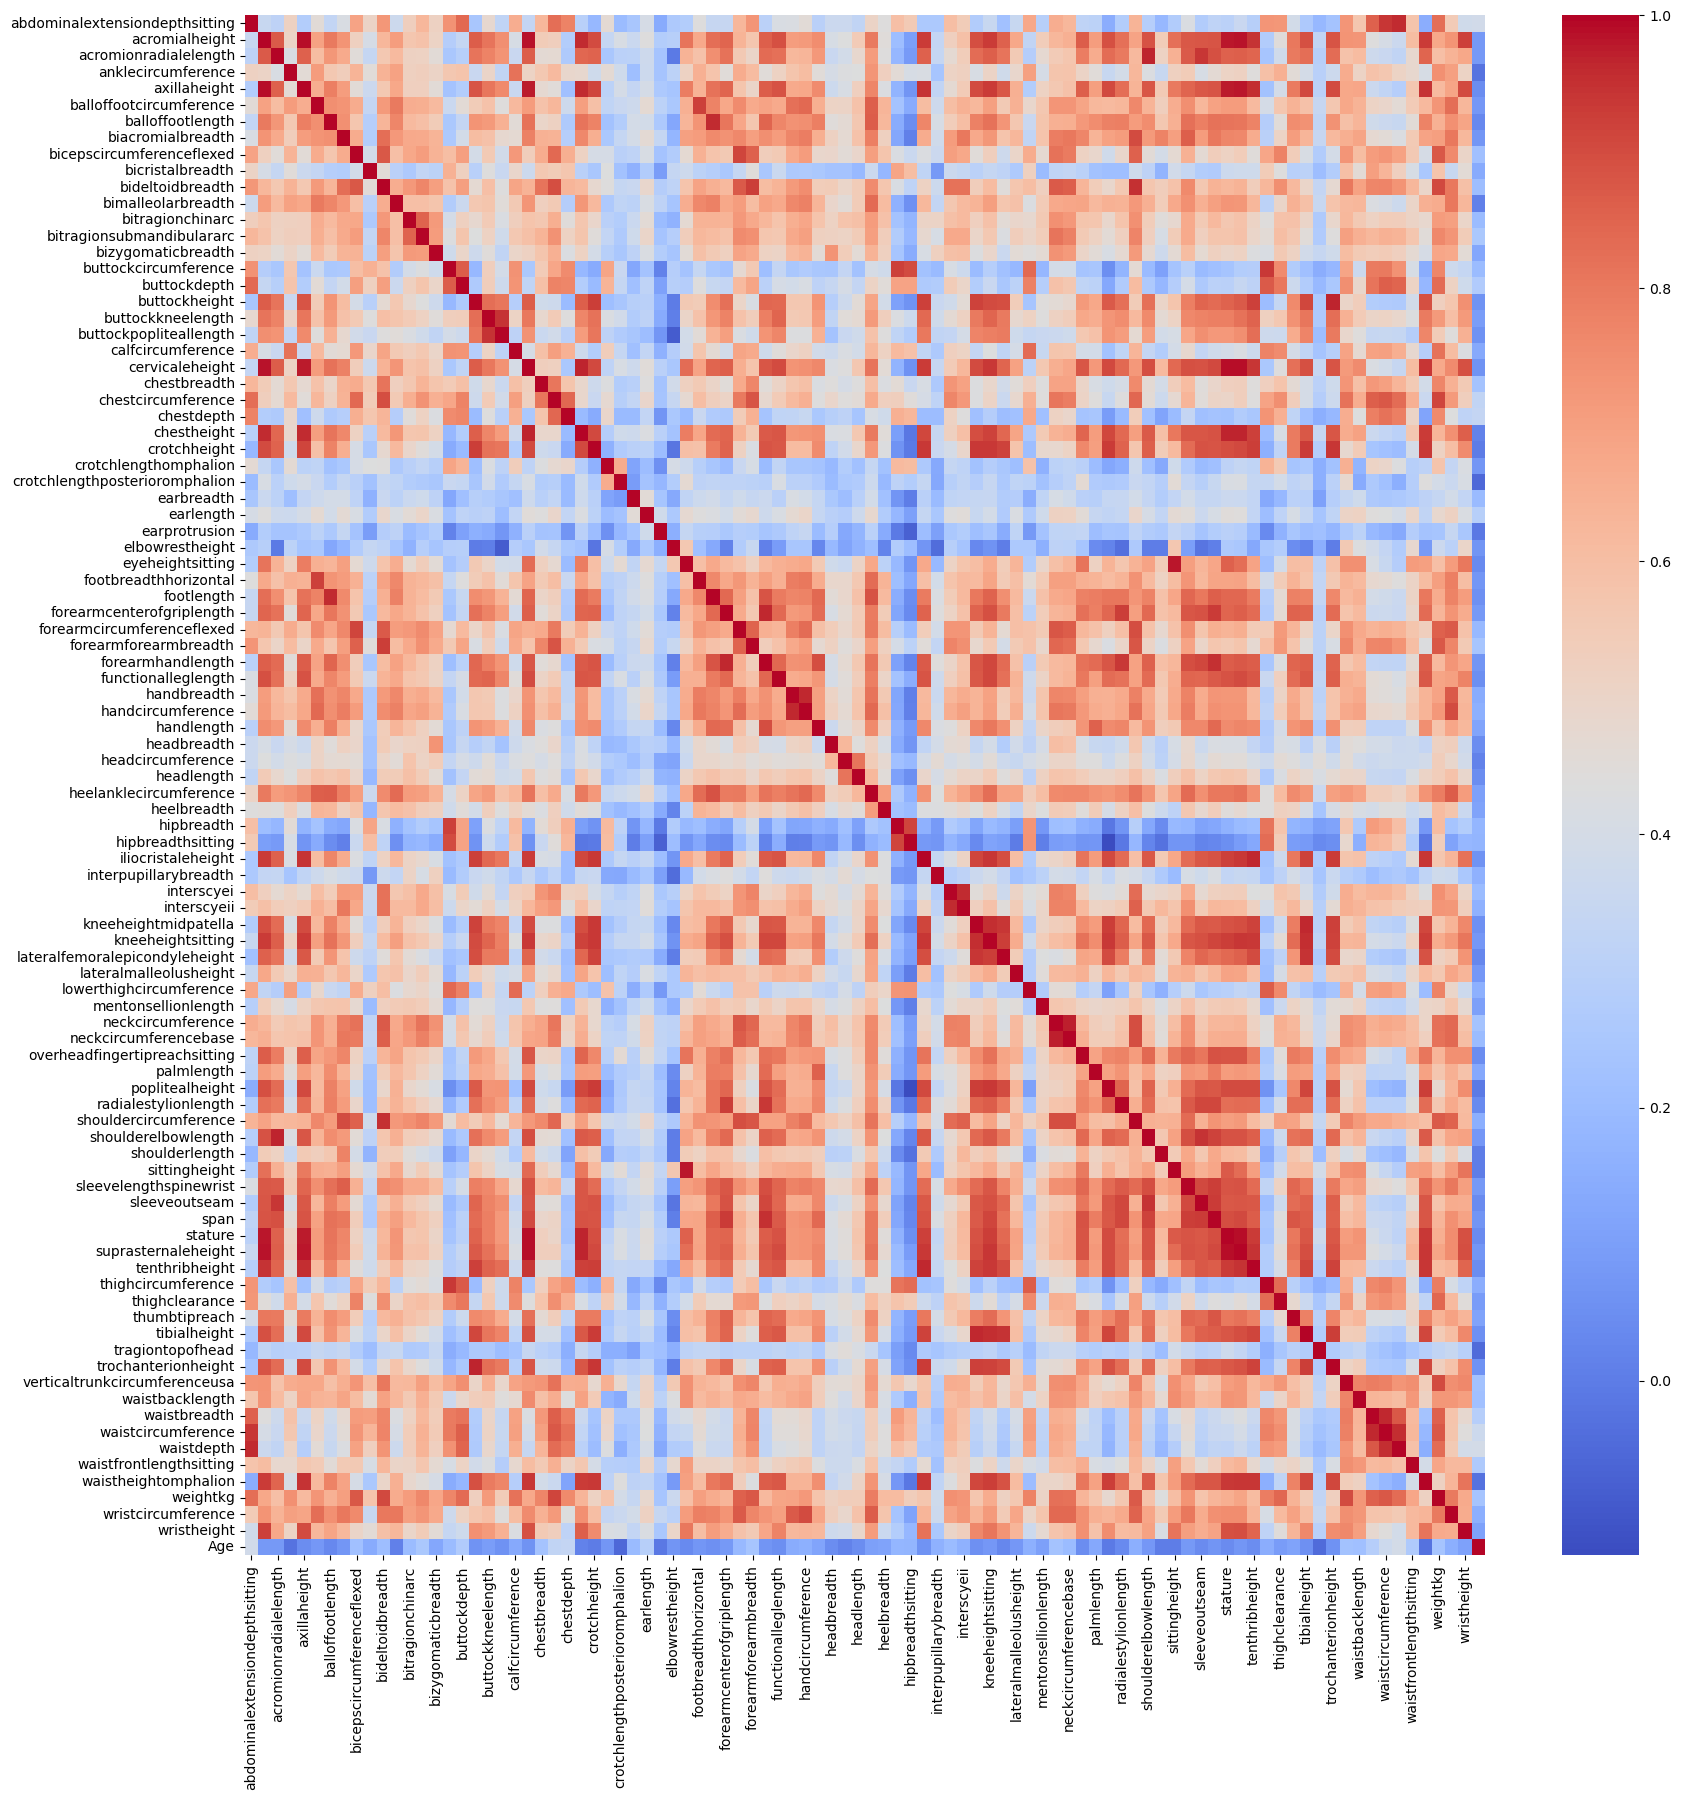

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr(), cmap ="coolwarm")

In [26]:
df_copy.shape

(5769, 98)

In [27]:
# df_copy.columns

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [31]:
X = df_copy.drop(["DODRace"], axis = 1)
y = df_copy.DODRace

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [34]:
cat_onehot = X_train.select_dtypes("object").columns
cat_onehot

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                            remainder="passthrough",verbose_feature_names_out=False) 

column_trans=column_trans.set_output(transform="pandas")

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

logistic = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)

operations = [("OneHotEncoder", column_trans), ("scaler", scaler), ("logistic", logistic)]

pipe_log_model = Pipeline(steps=operations)

pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [38]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[237  15   8]
 [  6 107  23]
 [ 13  92 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 984   34   20]
 [  16  460   67]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.94      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [39]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [40]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("OneHotEncoder", column_trans), ("scaler", scaler), ("logistic", logistic)]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
#                         n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.584
train_f1_Hispanic          0.669
test_precision_Hispanic    0.482
train_precision_Hispanic   0.549
test_recall_Hispanic       0.744
train_recall_Hispanic      0.856
dtype: float64

### Logistic Model GridsearchCV

In [41]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [42]:
from sklearn.model_selection import GridSearchCV

operations = [("OneHotEncoder", column_trans), ("scaler", scaler), ("logistic", logistic)]
pipe_grid_search = Pipeline(steps=operations)

param_grid = {
    'logistic__C': [0.001, 0.01,0.1, 0.5, 1],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__class_weight': ["balanced", None],

}

grid_search = GridSearchCV( pipe_grid_search,
                           param_grid,
                           scoring=recall_Hispanic,   # Find the best parameters
                           cv=10,
                           n_jobs=-1,
#                            verbose=3,  
                           return_train_score=True)

grid_search.fit(X_train, y_train)

/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_out

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [43]:
grid_search.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=42, solver='saga'))])

In [44]:
grid_search.best_score_

0.7643771043771045

In [45]:
pd.DataFrame(grid_search.cv_results_).loc[grid_search.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.764
mean_train_score   0.830
Name: 17, dtype: object

In [46]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 106  24]
 [ 15  92 651]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.50      0.78      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  20  449   74]
 [  73  344 2617]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



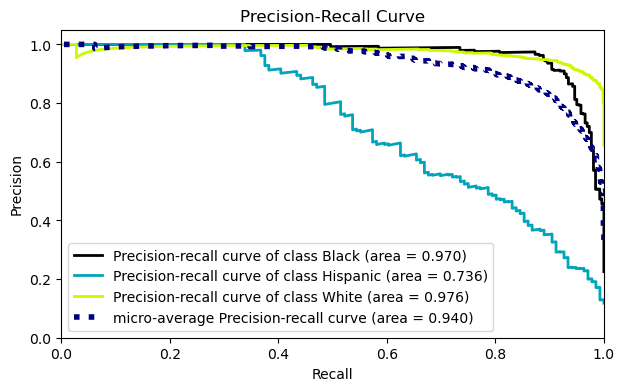

In [47]:
from scikitplot.metrics import plot_precision_recall

operations = [("OneHotEncoder", column_trans), ("scaler", scaler), ("logistic", logistic)]
model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [48]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

0.7361697307015976

In [49]:
y_pred = grid_search.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables.

## 2. SVC

### Vanilla SVC model

In [50]:
from sklearn.svm import SVC

svc = SVC(class_weight="balanced",random_state=42)

operations_svc = [("OneHotEncoder", column_trans), ("scaler", scaler), ("svc", svc)]
pipe_svc_model = Pipeline(steps=operations_svc)

pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [51]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  11  14]
 [  6 102  28]
 [ 10  87 661]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.51      0.75      0.61       136
       White       0.94      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 985   22   31]
 [  13  488   42]
 [  43  313 2678]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.59      0.90      0.71       543
       White       0.97      0.88      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.86      4615
weighted avg       0.92      0.90      0.91      4615



In [52]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
#                         n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_out

test_f1_Hispanic           0.595
train_f1_Hispanic          0.716
test_precision_Hispanic    0.500
train_precision_Hispanic   0.593
test_recall_Hispanic       0.739
train_recall_Hispanic      0.903
dtype: float64

###  SVC Model GridsearchCV

In [53]:
operations_svc = [("OneHotEncoder", column_trans), ("scaler", scaler), ("svc", svc)]
pipe_grid_svc = Pipeline(steps=operations_svc)

param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]    
}

gridsearch_svc = GridSearchCV( pipe_grid_svc,
                           param_grid,
                           scoring=recall_Hispanic,   # Find the best parameters
                           cv=10,
                           n_jobs=-1,
#                            verbose=3,  
                           return_train_score=True)

gridsearch_svc.fit(X_train, y_train)

/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_out

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [54]:
gridsearch_svc.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced', random_state=42))])

In [55]:
gridsearch_svc.best_score_

0.7385521885521886

In [56]:
pd.DataFrame(gridsearch_svc.cv_results_).loc[gridsearch_svc.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.739
mean_train_score   0.903
Name: 0, dtype: object

In [57]:
eval_metric(gridsearch_svc, X_train, y_train, X_test, y_test)

Test_Set
[[235  11  14]
 [  6 102  28]
 [ 10  87 661]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.51      0.75      0.61       136
       White       0.94      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 985   22   31]
 [  13  488   42]
 [  43  313 2678]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.59      0.90      0.71       543
       White       0.97      0.88      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.86      4615
weighted avg       0.92      0.90      0.91      4615



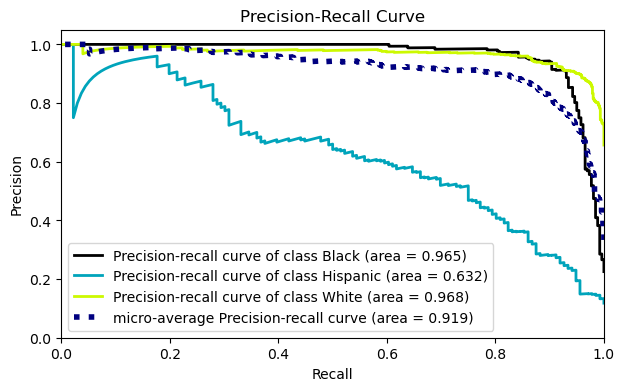

In [58]:
operations_svc = [("OneHotEncoder", column_trans), ("scaler", scaler), ("svc", svc)]
model = Pipeline(steps=operations_svc)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [59]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6318731372781079

In [60]:
y_pred = gridsearch_svc.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [61]:
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder="passthrough",verbose_feature_names_out=False) 

column_trans=column_trans.set_output(transform="pandas")

### Vanilla RF Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(class_weight="balanced", random_state=42)

operations_rf = [("OrdinalEncoder", column_trans), ("scaler", scaler), ("RF_model", RF_model)]
pipe_rf_model = Pipeline(steps=operations_rf)

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [63]:
eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[181   1  78]
 [  7   2 127]
 [  8   0 750]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.79       260
    Hispanic       0.67      0.01      0.03       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.79      0.57      0.57      1154
weighted avg       0.80      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [64]:
RF = RandomForestClassifier(max_depth=3,class_weight="balanced", random_state=42)

operations_r = [("OrdinalEncoder", column_trans), ("scaler", scaler), ("RF", RF)]
pipe_rfmodel = Pipeline(steps=operations_r)

pipe_rfmodel.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=42))])

In [65]:
eval_metric(pipe_rfmodel, X_train, y_train, X_test, y_test)

Test_Set
[[196  47  17]
 [ 14  84  38]
 [ 69 290 399]]
              precision    recall  f1-score   support

       Black       0.70      0.75      0.73       260
    Hispanic       0.20      0.62      0.30       136
       White       0.88      0.53      0.66       758

    accuracy                           0.59      1154
   macro avg       0.59      0.63      0.56      1154
weighted avg       0.76      0.59      0.63      1154


Train_Set
[[ 787  159   92]
 [  50  346  147]
 [ 265 1054 1715]]
              precision    recall  f1-score   support

       Black       0.71      0.76      0.74      1038
    Hispanic       0.22      0.64      0.33       543
       White       0.88      0.57      0.69      3034

    accuracy                           0.62      4615
   macro avg       0.60      0.65      0.58      4615
weighted avg       0.76      0.62      0.66      4615



In [66]:
model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
#                         n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test_f1_Hispanic           0.078
train_f1_Hispanic          1.000
test_precision_Hispanic    0.652
train_precision_Hispanic   1.000
test_recall_Hispanic       0.042
train_recall_Hispanic      1.000
dtype: float64

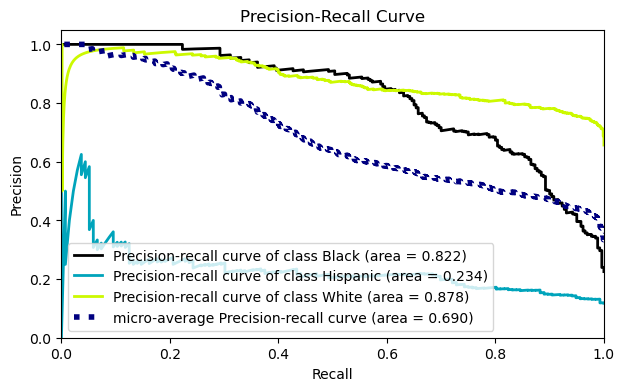

In [67]:
operations_rf = [("OrdinalEncoder", column_trans), ("scaler", scaler), ("RF_model", RF_model)]
model = Pipeline(steps=operations_r)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

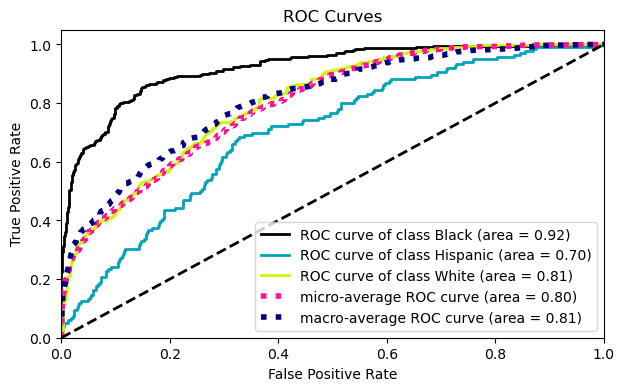

In [68]:
from scikitplot.metrics import plot_roc

y_pred_probe = pipe_rfmodel.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe)
plt.show();

In [69]:
pipe_rfmodel["RF"].feature_importances_

array([0.00673765, 0.00321829, 0.        , 0.        , 0.00839829,
       0.00177908, 0.00081933, 0.00518709, 0.00057757, 0.00117941,
       0.00122541, 0.00070826, 0.05070603, 0.00093245, 0.00173955,
       0.00340021, 0.00238191, 0.00466346, 0.        , 0.00023447,
       0.01815107, 0.05302556, 0.08225171, 0.        , 0.00618003,
       0.0060835 , 0.00042697, 0.        , 0.00805748, 0.02346072,
       0.00028537, 0.        , 0.        , 0.01430084, 0.02927982,
       0.07851841, 0.08716895, 0.00029489, 0.00192063, 0.0198354 ,
       0.00041103, 0.00089471, 0.02113413, 0.00025245, 0.        ,
       0.        , 0.03198527, 0.00066975, 0.01605221, 0.00107482,
       0.        , 0.02608627, 0.0018405 , 0.        , 0.02467525,
       0.0431854 , 0.00166327, 0.00012418, 0.00837204, 0.00447739,
       0.00925245, 0.00917773, 0.00061492, 0.00174579, 0.00314369,
       0.        , 0.00029458, 0.00786381, 0.00171665, 0.02115515,
       0.00093408, 0.00068581, 0.        , 0.08665   , 0.     

In [70]:
features = pipe_rfmodel["OrdinalEncoder"].get_feature_names_out()
features

array(['Gender', 'SubjectsBirthLocation', 'WritingPreference',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbread

In [71]:
rf_feature_imp = pd.DataFrame(data=pipe_rfmodel["RF"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
eyeheightsitting,0.087
sittingheight,0.087
buttockpopliteallength,0.082
elbowrestheight,0.079
buttockkneelength,0.053
...,...
calfcircumference,0.000
buttockcircumference,0.000
neckcircumferencebase,0.000
crotchlengthposterioromphalion,0.000


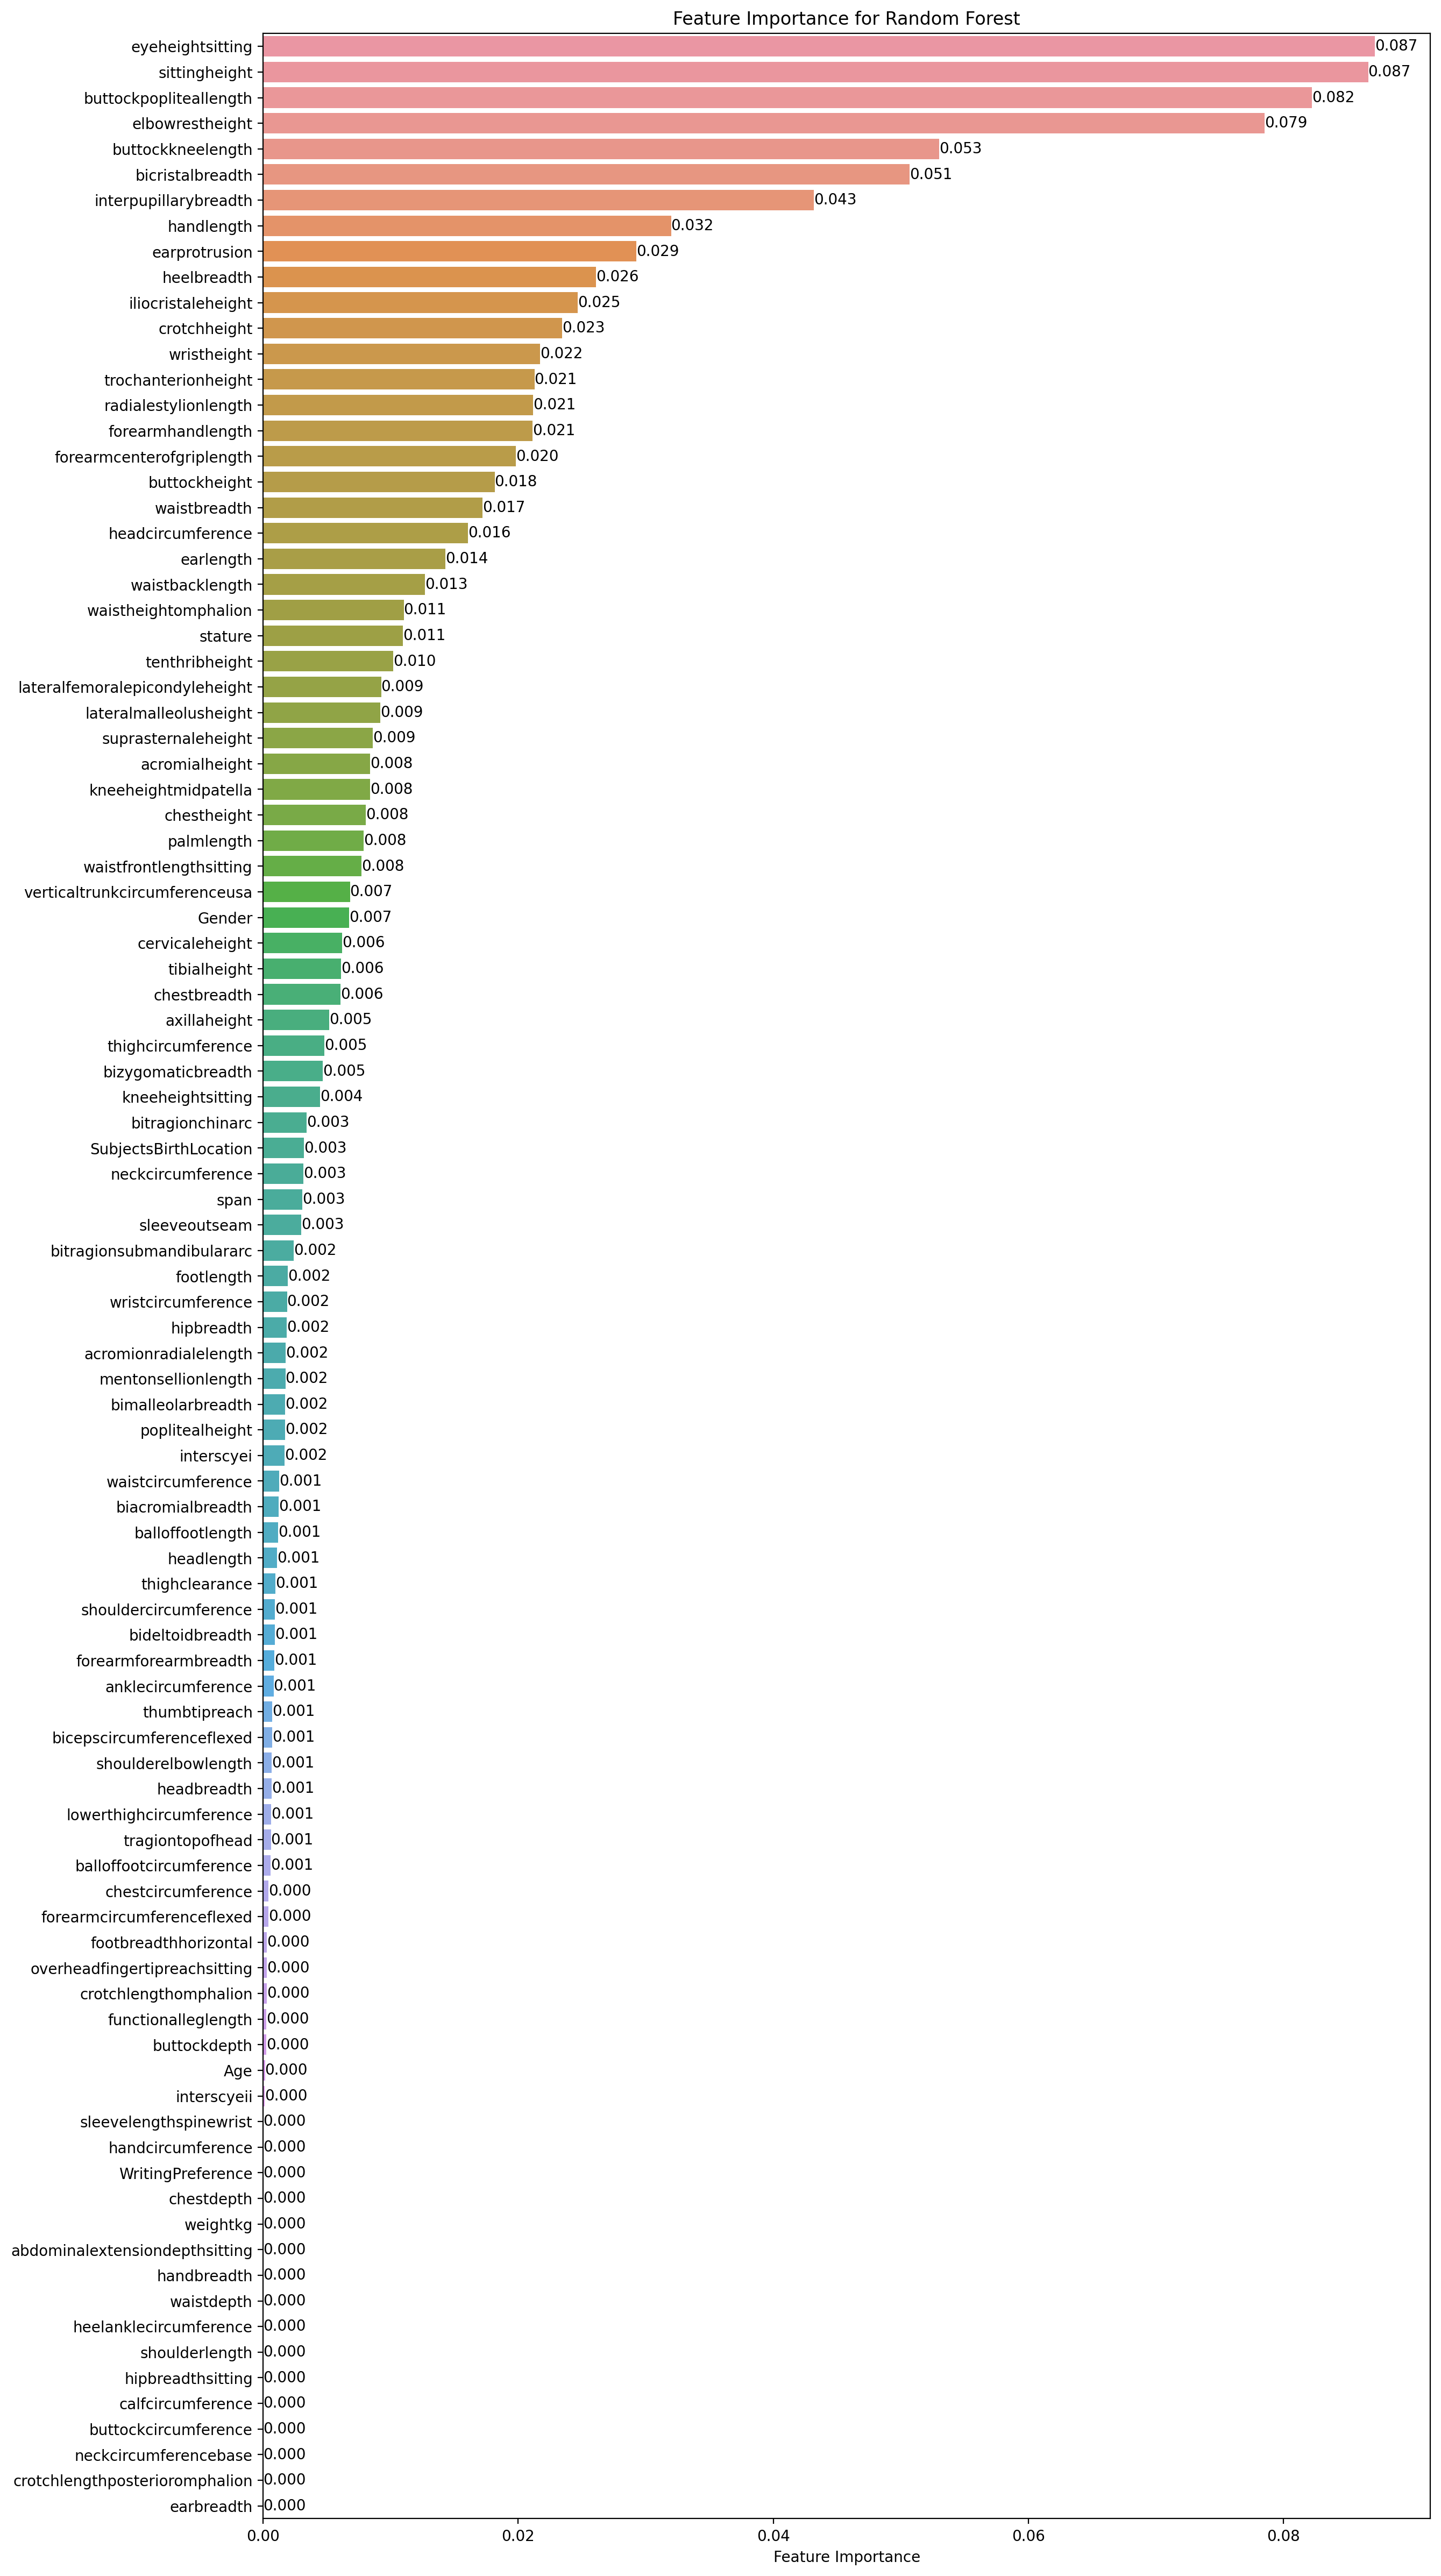

In [72]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

### RF Model GridsearchCV

In [74]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]
pipe_grid_rf = Pipeline(steps=operations_rf)

# param_grid = {
#     "RF_model__n_estimators": [400, 500],
#     "RF_model__max_depth": [2, 3],
# #     'RF_model__min_samples_split':[18,20,22],
# #     'RF_model__max_features': ['auto', None, 15, 20]
# }
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

gridsearch_rf = GridSearchCV( pipe_grid_rf,
                              param_grid,
                              scoring=recall_Hispanic,   # Find the best parameters
#                             cv=10,
                              n_jobs=-1,
#                               verbose=3,  
                              return_train_score=True)

gridsearch_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(cla...
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [75]:
gridsearch_rf.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=64,
                                        random_state=42))])

In [76]:
gridsearch_rf.best_score_

0.6628950050968399

In [77]:
pd.DataFrame(gridsearch_rf.cv_results_).loc[gridsearch_rf.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.663
mean_train_score   0.674
Name: 1, dtype: object

In [78]:
eval_metric(gridsearch_rf, X_train, y_train, X_test, y_test)

Test_Set
[[151  87  22]
 [  8  88  40]
 [ 44 332 382]]
              precision    recall  f1-score   support

       Black       0.74      0.58      0.65       260
    Hispanic       0.17      0.65      0.27       136
       White       0.86      0.50      0.64       758

    accuracy                           0.54      1154
   macro avg       0.59      0.58      0.52      1154
weighted avg       0.75      0.54      0.60      1154


Train_Set
[[ 594  337  107]
 [  42  359  142]
 [ 194 1178 1662]]
              precision    recall  f1-score   support

       Black       0.72      0.57      0.64      1038
    Hispanic       0.19      0.66      0.30       543
       White       0.87      0.55      0.67      3034

    accuracy                           0.57      4615
   macro avg       0.59      0.59      0.54      4615
weighted avg       0.76      0.57      0.62      4615



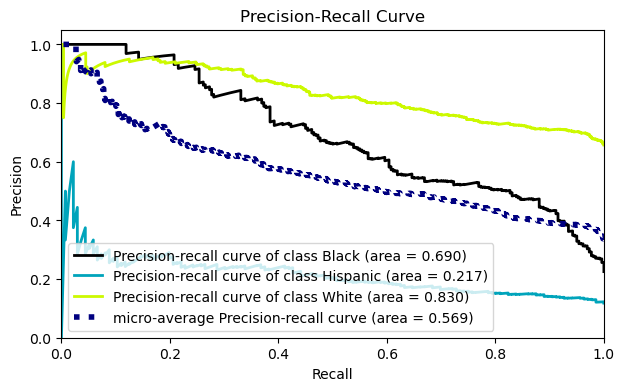

In [79]:
y_pred_proba = gridsearch_rf.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

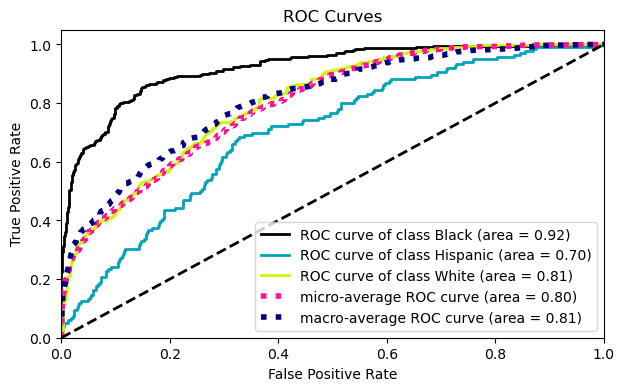

In [80]:
plot_roc(y_test, y_pred_probe)
plt.show();

In [81]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.21663055082738641

In [82]:
y_pred = gridsearch_rf.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [83]:
# pip install xgboost

In [84]:
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [85]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [86]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42,eval_metric='mlogloss')

operations_xgb = [("preprocessor", column_trans),("XGB_model", xgb_model)]

pipe_xgb_model = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})

pipe_xgb_model.fit(X_train, y_train_xgb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [87]:
eval_metric(pipe_xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



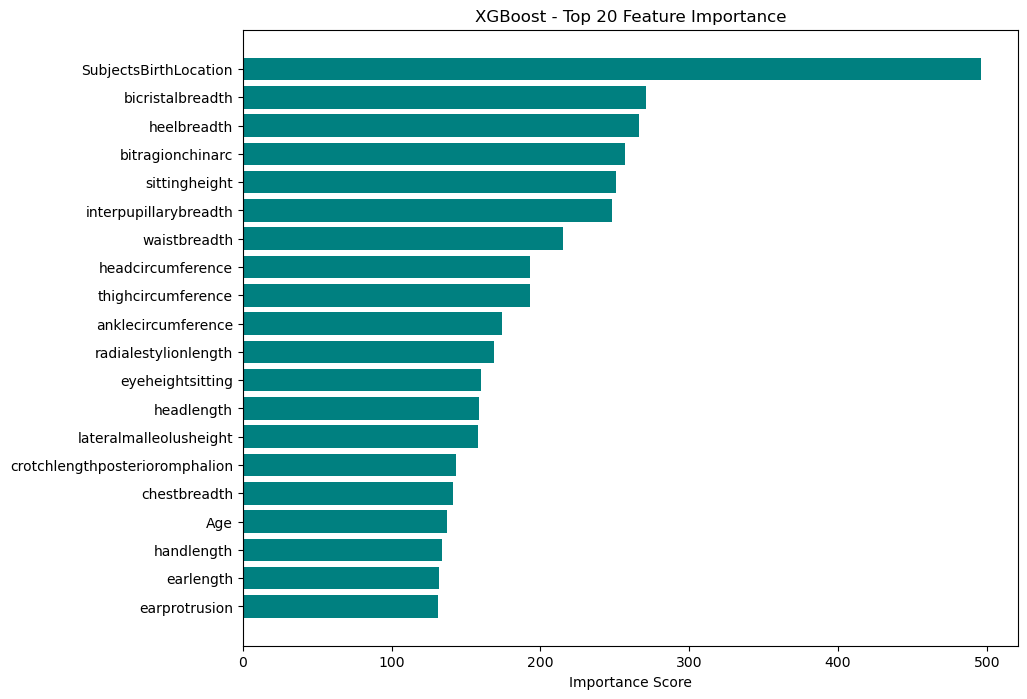

In [88]:
feature_importances = xgb_model.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [89]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train_xgb)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [90]:
pipe_xgb_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [91]:
# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])

xgb_scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [92]:
XGB_model = XGBClassifier(random_state=42,eval_metric='mlogloss')

operations_xgb = [("preprocessor", column_trans),("XGB_model", XGB_model)]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model,
                        X_train,
                        y_train_xgb,
                        scoring=xgb_scoring,
                        cv=10,
#                         n_jobs=-1,
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight": classes_weights},
                       )

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.552
train_f1_hispanic          1.000
test_precision_hispanic    0.725
train_precision_hispanic   1.000
test_recall_hispanic       0.448
train_recall_hispanic      1.000
dtype: float64

### XGBoost Model GridsearchCV

In [93]:
XGB_model = XGBClassifier(random_state=42,eval_metric='mlogloss')

operations_xgb = [("preprocessor", column_trans),("XGB_model", XGB_model)]

pipe_xgb_grid = Pipeline(steps=operations_xgb)

param_grid = {"XGB_model__n_estimators":[100, 300],
              'XGB_model__max_depth':[3,5,6],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.5, 1],
              "XGB_model__colsample_bytree":[0.5,1]} 


gridsearch_xgb = GridSearchCV( pipe_xgb_grid,
                              param_grid,
                              scoring=recall_Hispanic,  
                              cv=10,
                              n_jobs=-1,
#                               verbose=3,  
                              return_train_score=True)


In [94]:
gridsearch_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

/Users/noura/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behav

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 1],
                         'XGB_model__learning_rate': [0.1, 0.3],
                         'XGB_model__max_depth': [3, 5, 6],
                         'XGB_model__n_estimators': [100, 300],
                         'XGB_model__subsample': [0.5, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [95]:
gridsearch_xgb.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [96]:
gridsearch_xgb.best_params_ 

{'XGB_model__colsample_bytree': 0.5,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.5}

In [97]:
gridsearch_xgb.best_score_

0.0

In [98]:
pd.DataFrame(gridsearch_xgb.cv_results_).loc[gridsearch_xgb.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.000
mean_train_score   0.000
Name: 0, dtype: object

In [99]:
eval_metric(gridsearch_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[231  15  14]
 [ 11  93  32]
 [ 26  96 636]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       260
           1       0.46      0.68      0.55       136
           2       0.93      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.77      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[ 969   31   38]
 [  23  462   58]
 [  89  325 2620]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1038
           1       0.56      0.85      0.68       543
           2       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



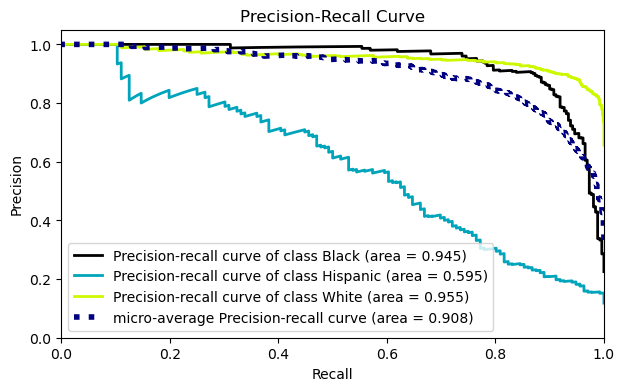

In [100]:
y_pred_proba = gridsearch_xgb.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [101]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [102]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.595397546990409

In [103]:
y_pred = gridsearch_xgb.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

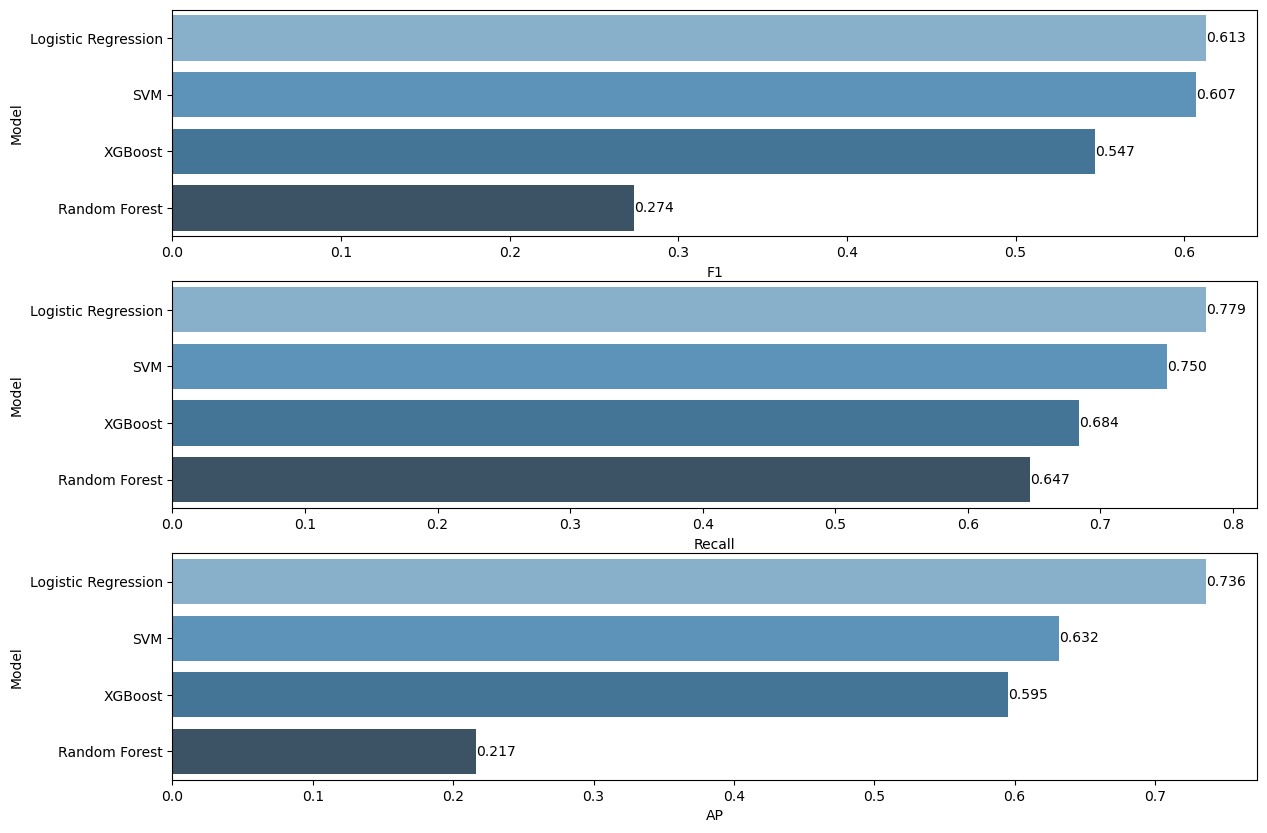

In [104]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

<!-- Comparing Models -->

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

<!-- 
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)
plt.show() -->

In [106]:
logistic = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)

scaler = StandardScaler()

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                            remainder="passthrough",verbose_feature_names_out=False)

operations = [("OneHotEncoder", column_trans), ("scaler", scaler), ("logistic", logistic)]
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [107]:
final_model.predict(X.loc[[200]])

array(['Black'], dtype=object)

In [108]:
y[200]

'Black'

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [109]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8033058465581524

In [110]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7956189110868771

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [111]:
# !pip install imblearn

In [112]:
# conda install -c conda-forge imbalanced-learn

In [113]:
# pip install scikit-learn==1.2.2

In [114]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [115]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    remainder="passthrough",
)
X_train_ohe = column_trans.fit_transform(X_train)

In [116]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [117]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [118]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [142]:
logistic = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)

scaler = StandardScaler()

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),remainder="passthrough")

operations = [("OneHotEncoder", column_trans), ("o", over),("u", under), ("logistic", logistic)]

In [143]:
smote_pipeline = imbpipeline(steps=operations)

In [144]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [145]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237  16   7]
 [  5 102  29]
 [ 15 104 639]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       260
    Hispanic       0.46      0.75      0.57       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 975   37   26]
 [  43  416   84]
 [  68  397 2569]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.49      0.77      0.60       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.78      0.85      0.80      4615
weighted avg       0.89      0.86      0.87      4615



In [146]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
                       )

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/noura/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_out

test_f1_Hispanic           0.542
train_f1_Hispanic          0.605
test_precision_Hispanic    0.443
train_precision_Hispanic   0.495
test_recall_Hispanic       0.702
train_recall_Hispanic      0.778
dtype: float64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___